In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [13]:
df = pd.read_csv("/Users/vedikagoyal/Desktop/python_jn/Mall_Customers.csv")

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missin

In [14]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [16]:

wcss = []
silhouette_scores = []
K_range = range(2, 11)  # start from 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

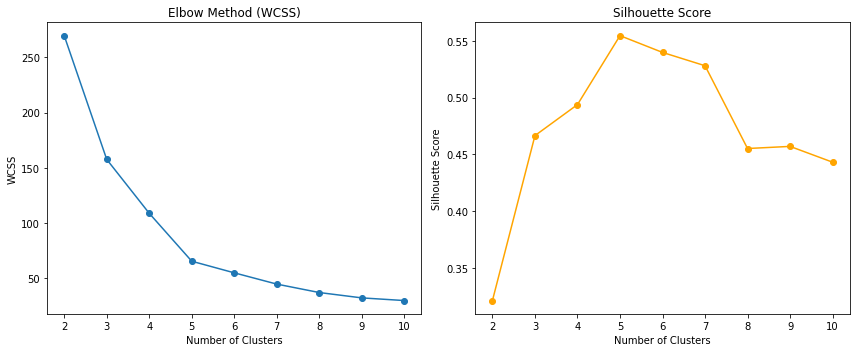

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.tight_layout()
plt.show()

In [18]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

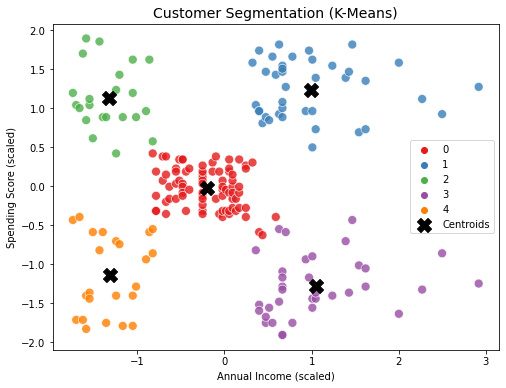

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],
                hue=df['Cluster'], palette='Set1', s=80, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c='black', marker='X', s=200, label='Centroids')
plt.title('Customer Segmentation (K-Means)', fontsize=14)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [20]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary (Average Income & Spending):")
print(cluster_summary)


Cluster Summary (Average Income & Spending):
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


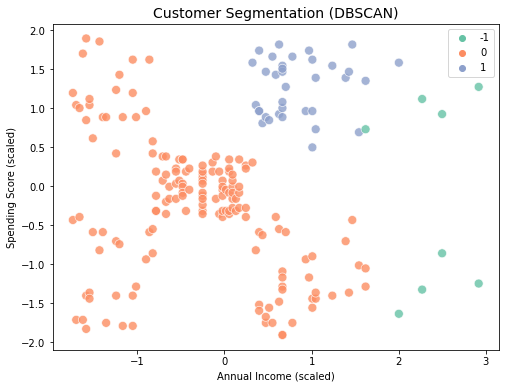

In [21]:
# BONUS: DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],
                hue=df['DBSCAN_Cluster'], palette='Set2', s=80, alpha=0.8)
plt.title('Customer Segmentation (DBSCAN)', fontsize=14)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


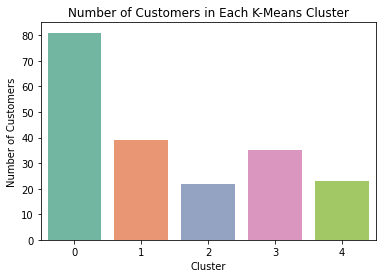


Detailed Cluster Summary:
        Annual Income (k$)          Spending Score (1-100)         Count
                      mean min  max                   mean min max count
Cluster                                                                 
0                55.296296  39   76              49.518519  34  61    81
1                86.538462  69  137              82.128205  63  97    39
2                25.727273  15   39              79.363636  61  99    22
3                88.200000  70  137              17.114286   1  39    35
4                26.304348  15   39              20.913043   3  40    23

 DBSCAN identified 8 noise points.


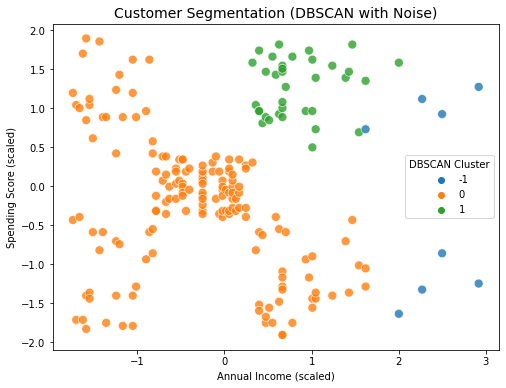

In [22]:
# Cluster Size Distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="Set2")
plt.title("Number of Customers in Each K-Means Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

# Detailed Cluster Summary
cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Cluster': 'count'
}).rename(columns={'Cluster': 'Count'})

print("\nDetailed Cluster Summary:")
print(cluster_summary)

# DBSCAN
noise_points = sum(df['DBSCAN_Cluster'] == -1)
print(f"\n DBSCAN identified {noise_points} noise points.")

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1],
                hue=df['DBSCAN_Cluster'], palette='tab10', s=80, alpha=0.8)
plt.title('Customer Segmentation (DBSCAN with Noise)', fontsize=14)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title="DBSCAN Cluster")
plt.show()
